# MNIST — классификация рукописных цифр
Softmax-регрессия на NumPy с mini-batch SGD

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Загрузка и подготовка данных

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0  # нормализация [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (56000, 784), Test: (14000, 784)


## One-hot encoding и Softmax

In [4]:
def one_hot(y, num_classes=10):
    oh = np.zeros((y.shape[0], num_classes))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

Y_train = one_hot(y_train)
Y_test = one_hot(y_test)

## Параметры модели

In [5]:
n_features = 784
n_classes = 10
lr = 0.1
epochs = 200
batch_size = 256

W = np.zeros((n_features, n_classes))  # (784, 10)
b = np.zeros((1, n_classes))           # (1, 10)

## Обучение (mini-batch SGD)

In [6]:
n = X_train.shape[0]

for epoch in range(epochs):
    indices = np.random.permutation(n)
    X_shuf = X_train[indices]
    Y_shuf = Y_train[indices]

    for i in range(0, n, batch_size):
        X_batch = X_shuf[i:i+batch_size]
        Y_batch = Y_shuf[i:i+batch_size]
        m = X_batch.shape[0]

        # forward pass
        logits = X_batch @ W + b
        probs = softmax(logits)

        # градиенты (cross-entropy loss)
        error = probs - Y_batch
        dW = (X_batch.T @ error) / m
        db = np.mean(error, axis=0, keepdims=True)

        # обновление весов
        W -= lr * dW
        b -= lr * db

    if (epoch + 1) % 20 == 0:
        logits = X_train @ W + b
        probs = softmax(logits)
        loss = -np.mean(np.sum(Y_train * np.log(probs + 1e-8), axis=1))
        pred = np.argmax(probs, axis=1)
        acc = np.mean(pred == y_train)
        print(f"Epoch {epoch+1:3d} | Loss: {loss:.4f} | Train Acc: {acc:.4f}")

Epoch  20 | Loss: 0.2851 | Train Acc: 0.9200
Epoch  40 | Loss: 0.2670 | Train Acc: 0.9257
Epoch  60 | Loss: 0.2587 | Train Acc: 0.9278
Epoch  80 | Loss: 0.2531 | Train Acc: 0.9296
Epoch 100 | Loss: 0.2492 | Train Acc: 0.9311
Epoch 120 | Loss: 0.2465 | Train Acc: 0.9319
Epoch 140 | Loss: 0.2443 | Train Acc: 0.9325
Epoch 160 | Loss: 0.2423 | Train Acc: 0.9330
Epoch 180 | Loss: 0.2397 | Train Acc: 0.9334
Epoch 200 | Loss: 0.2387 | Train Acc: 0.9337


## Оценка на тесте

In [7]:
logits = X_test @ W + b
pred = np.argmax(softmax(logits), axis=1)
print(f"Test Accuracy: {np.mean(pred == y_test):.4f}")

Test Accuracy: 0.9219


## Визуализация весов (трафареты)

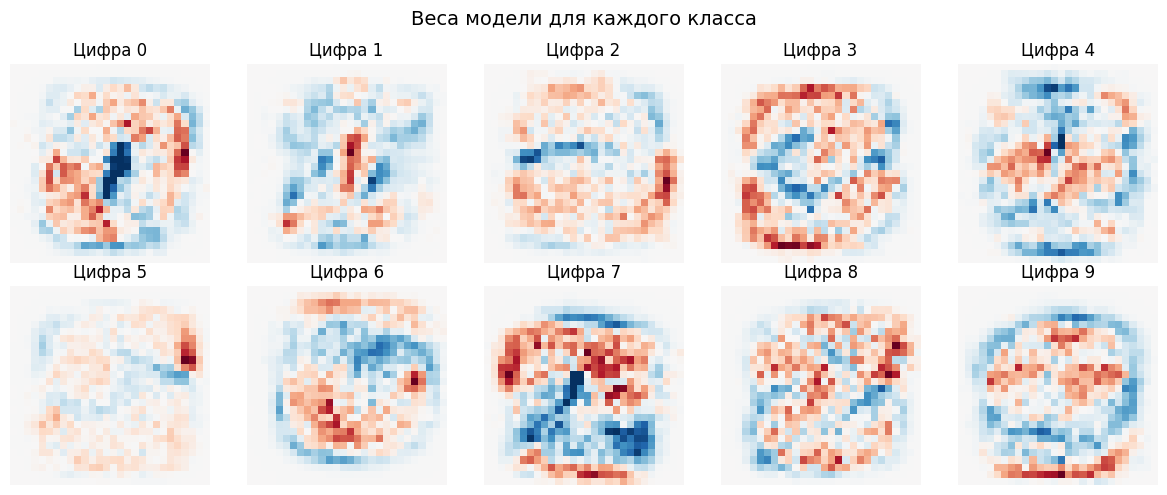

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    img = W[:, digit].reshape(28, 28)
    ax.imshow(img, cmap="RdBu_r", vmin=-img.max(), vmax=img.max())
    ax.set_title(f"Цифра {digit}")
    ax.axis("off")

fig.suptitle("Веса модели для каждого класса", fontsize=14)
plt.tight_layout()
plt.show()